In [1]:
#Step 1 - Importing all required libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
#Step 2 - Creating a pandas dataframe named "df_311nyc" from the data available in csv format

In [4]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_51a3837687ca424c88d81a9214afdc84 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='<replace_with_your_ibm_api_key_id>',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_51a3837687ca424c88d81a9214afdc84.get_object(Bucket='<replace_with_your_bucket_id>',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_311nyc = pd.read_csv(body, parse_dates = ['created_date'])
df_311nyc.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-01 17:14:28,43695466,UNSANITARY CONDITION,11368.0,97-05 HORACE HARDING EXPRESSWAY,HORACE HARDING EXPRESSWAY,ADDRESS,Corona,The following complaint conditions are still o...,QUEENS,40.734899,-73.862526,NaN,RESIDENTIAL BUILDING,Open
1,2019-09-01 14:31:35,43697294,GENERAL,11233.0,110 ROCHESTER AVENUE,ROCHESTER AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.675350,-73.927728,NaN,RESIDENTIAL BUILDING,Open
2,2019-09-01 20:28:51,43701077,HEAT/HOT WATER,11225.0,271 HAWTHORNE STREET,HAWTHORNE STREET,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.657774,-73.951466,NaN,RESIDENTIAL BUILDING,Open
3,2019-09-01 11:54:18,43697359,WATER LEAK,10467.0,2714 WALLACE AVENUE,WALLACE AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.865959,-73.864435,NaN,RESIDENTIAL BUILDING,Open
4,2019-09-01 14:53:00,43694530,HEAT/HOT WATER,11225.0,271 HAWTHORNE STREET,HAWTHORNE STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.657774,-73.951466,NaN,RESIDENTIAL BUILDING,Open


In [5]:
#Step 3 - Creating a sub dataframe named "df_311nyc_top_complaint" from the main dataframe "df_311nyc" that contains only those samples for which complaint type is HEAT/HOT WATER as we want to understand the distribution of the top complaint identified in problem set 1 across different areas.

In [6]:
df_311nyc_top_complaint = df_311nyc[df_311nyc['complaint_type'] == 'HEAT/HOT WATER'].reset_index(drop = True)
df_311nyc_top_complaint.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-01 20:28:51,43701077,HEAT/HOT WATER,11225.0,271 HAWTHORNE STREET,HAWTHORNE STREET,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.657774,-73.951466,NaN,RESIDENTIAL BUILDING,Open
1,2019-09-01 14:53:00,43694530,HEAT/HOT WATER,11225.0,271 HAWTHORNE STREET,HAWTHORNE STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.657774,-73.951466,NaN,RESIDENTIAL BUILDING,Open
2,2019-09-01 10:53:21,43700138,HEAT/HOT WATER,11226.0,1801 DORCHESTER ROAD,DORCHESTER ROAD,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.640593,-73.961258,NaN,RESIDENTIAL BUILDING,Open
3,2019-09-01 22:54:58,43695397,HEAT/HOT WATER,11418.0,135-20 JAMAICA AVENUE,JAMAICA AVENUE,ADDRESS,Richmond Hill,The following complaint conditions are still o...,QUEENS,40.702415,-73.817308,NaN,RESIDENTIAL BUILDING,Open
4,2019-09-01 20:35:02,43695424,HEAT/HOT WATER,10032.0,540 WEST 158 STREET,WEST 158 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.833980,-73.942777,NaN,RESIDENTIAL BUILDING,Open


In [7]:
#Step 4 - To understand the distribution of top complaint type across different boroughs, considering the column named "borough" and checking number of boroughs using "unique" function

In [8]:
df_311nyc_top_complaint['borough'].unique()

array(['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND',
       'Unspecified'], dtype=object)

In [9]:
#Step 5 - To visualize the distribution of top complaint type graphically, implementing scatter plot across the uniquely identified boroughs above

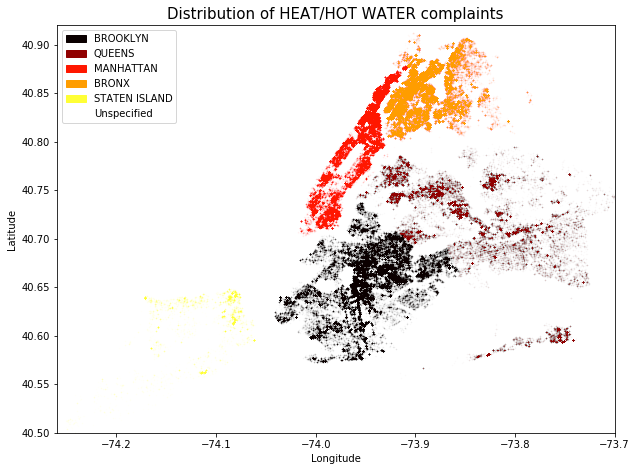

In [10]:
# adjust settings
plt.figure(figsize=(10,7.5))

# list of unique values in borough column
list_value_borough = list(df_311nyc_top_complaint['borough'].unique())
patches = []

# setting color map
color_map = plt.cm.hot(np.linspace(0,1, len(list_value_borough)))
                           
for index, value in enumerate(list_value_borough):
    borough_top_complaint = df_311nyc_top_complaint[df_311nyc_top_complaint['borough']== value]
    plt.scatter(borough_top_complaint.longitude, borough_top_complaint.latitude, s=1, 
                alpha=0.02,color= color_map[index], marker ='.')
    patches.append(mpatches.Patch(label=value, color=color_map[index]))

# create legend
plt.legend(patches,
           list_value_borough, 
           loc='upper left', prop={'size':10})

# adjust more settings
plt.title('Distribution of HEAT/HOT WATER complaints', size=15)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=10)
plt.ylabel('Latitude',size=10)
plt.show()

In [11]:
#Preliminary Conclusion - From the scatter plot above, it can be concluded that Bronx, Brooklyn and Manhattan are the severely affected areas.

In [12]:
#Step 6 - To make sure which borough is severely affected with maximum number of top complaint registered, calculating total frequency (occurance) of complaint type HEAT/HOT WATER using "value_counts()" function for all boroughs

In [13]:
df_311nyc_top_complaint['borough'].value_counts()

BRONX            374101
BROOKLYN         352126
MANHATTAN        260533
QUEENS           152421
STATEN ISLAND     11387
Unspecified           1
Name: borough, dtype: int64

In [14]:
#Preliminary Conclusion: From the results above, we can conclude that "Bronx" is most severely affected borough by the top complaint type

In [15]:
#Step 7 - Implementing bar chart to visualize data graphically and support our conclusion

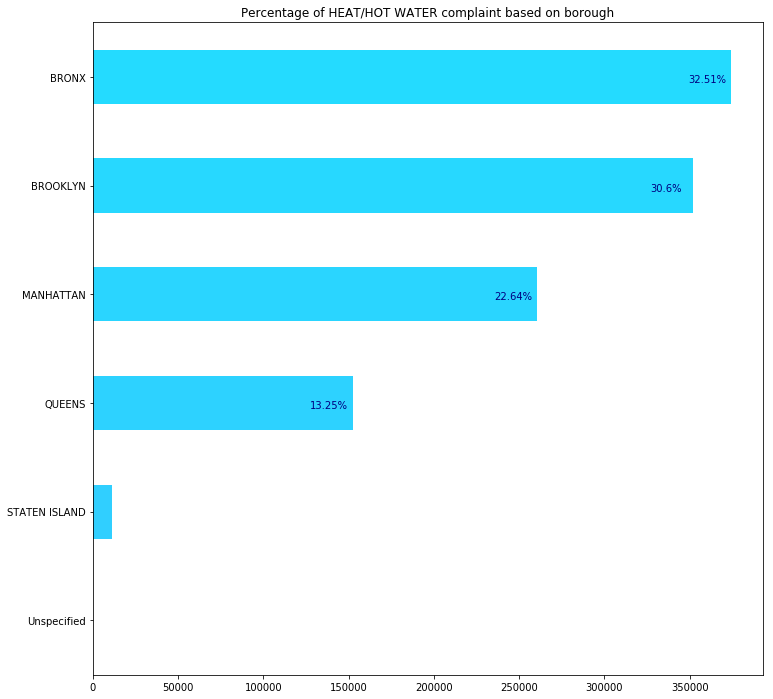

In [16]:
borough_series = df_311nyc_top_complaint['borough'].value_counts()
borough_series.sort_values(ascending = True, inplace =True)
total_borough = borough_series.sum()

# Create barh plot
color_scheme = plt.cm.cool(np.linspace(0.2, 0.1, 10)) 
borough_series.plot(kind = 'barh', figsize = (12, 12), color = color_scheme)

# Set text label to show the percentage of each borough
for index, value in enumerate(borough_series):
    label =  '{}%'.format(round((value/total_borough)*100, 2)) 
    plt.annotate(label, xy=(value - 25000, index- 0.05), color='navy')

    
plt.title('Percentage of HEAT/HOT WATER complaint based on borough')
plt.show()

In [17]:
#Step 8 - To make sure which street is severely affected with maximum number of top complaint registered, calculating total frequency (occurance) of complaint type HEAT/HOT WATER using "value_counts()" function for all streets

In [18]:
df_311nyc_top_complaint['street_name'].value_counts().head(10)

GRAND CONCOURSE             20359
BROADWAY                    14362
ELMHURST AVENUE              9913
OCEAN AVENUE                 9261
MORRIS AVENUE                9084
BOYNTON AVENUE               8396
ST NICHOLAS AVENUE           7886
AMSTERDAM AVENUE             6844
DR M L KING JR BOULEVARD     6346
OCEAN PARKWAY                5870
Name: street_name, dtype: int64

In [19]:
#Preliminary Conclusion: From the results above, we can conclude that "Grand Concourse" is most severely affected street by the top complaint

In [20]:
#Step 9 - Implementing bar chart to visualize data graphically and support our conclusion

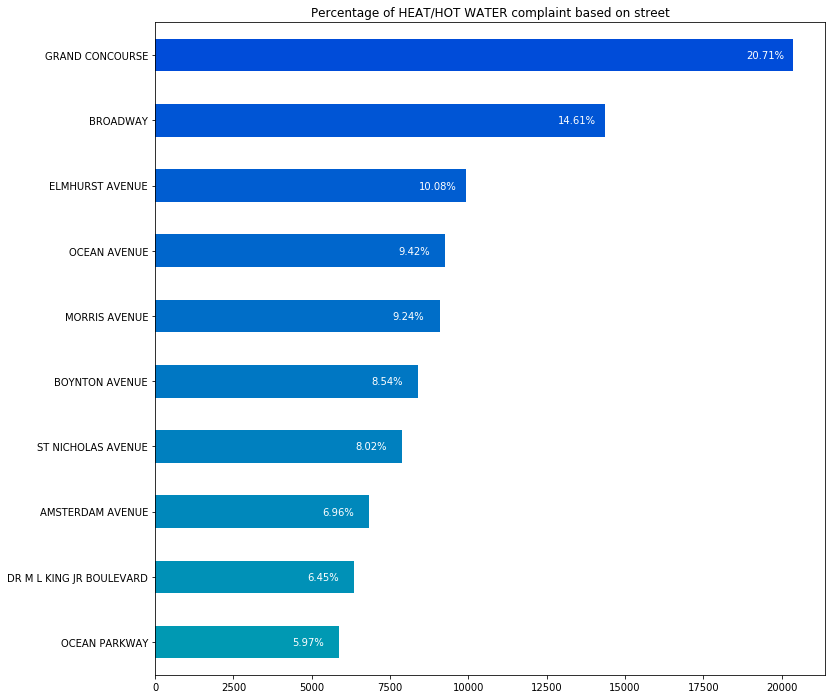

In [21]:
street_series = df_311nyc_top_complaint['street_name'].value_counts().head(10)
street_series.sort_values(ascending = True, inplace =True)
total_street = street_series.sum()

# Create barh plot
color_scheme = plt.cm.winter(np.linspace(0.6, 0.3, 10))
street_series.plot(kind = 'barh', figsize = (12, 12), color = color_scheme)

# Set text label to show the percentage of each borough
for index, value in enumerate(street_series):
    label =  '{}%'.format(round((value/total_street)*100, 2)) 
    plt.annotate(label, xy=(value - 1500, index- 0.05), color='white')

    
plt.title('Percentage of HEAT/HOT WATER complaint based on street')
plt.show()

In [22]:
#Step 10 - To make sure which zip code is severely affected with maximum number of top complaint registered, calculating total frequency (occurance) of complaint type HEAT/HOT WATER using "value_counts()" function for all zip codes

In [23]:
df_311nyc_top_complaint['incident_zip'].value_counts().head(10)

11226.0    38147
10458.0    35682
10467.0    34725
10468.0    31281
10453.0    31257
10452.0    25736
10031.0    25015
10457.0    24663
10456.0    23636
10462.0    23446
Name: incident_zip, dtype: int64

In [24]:
#Preliminary Conclusion: From the results above, we can conclude that "11226.0" is most severely affected zip code by the top complaint

In [25]:
#Step 11 - Implementing bar chart to visualize data graphically and support our conclusion

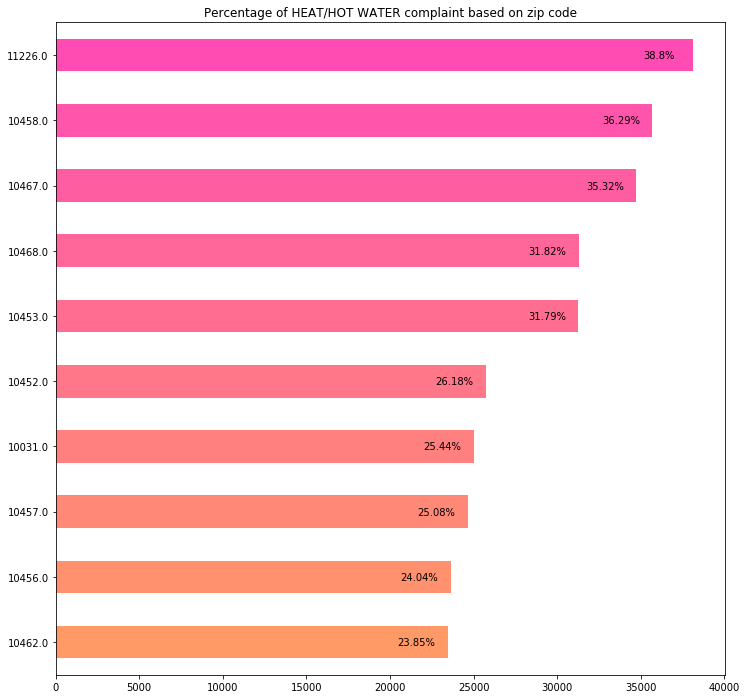

In [26]:
zip_series = df_311nyc_top_complaint['incident_zip'].value_counts().head(10)
zip_series.sort_values(ascending = True, inplace =True)
total_zip = zip_series.sum()
color_scheme = plt.cm.spring(np.linspace(0.6, 0.3, 10))
# Create barh plot
zip_series.plot(kind = 'barh', figsize = (12, 12), color = color_scheme)

# Set text label to show the percentage of each borough
for index, value in enumerate(zip_series):
    label =  '{}%'.format(round((value/total_street)*100, 2)) 
    plt.annotate(label, xy=(value - 3000, index- 0.05), color='black')

    
plt.title('Percentage of HEAT/HOT WATER complaint based on zip code')
plt.show()

In [27]:
#Conclusion 1: From our statistical and graphical analysis, we can say that the top complaint type i.e. HEAT/HOT WATER is more severe in BRONX in terms of borough, in GRAND CONCOURSE in terms of street and 11226.0 in terms of zip code. 

In [28]:
#Step 12 - Trying to locate GRAND CONCOURSE street w.r.t a borough

In [29]:
df_311nyc_top_complaint.loc[df_311nyc_top_complaint['street_name'] == "GRAND CONCOURSE"].head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
185,2019-08-31 10:56:39,43691047,HEAT/HOT WATER,10468.0,2877 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.870743,-73.889999,NaN,RESIDENTIAL BUILDING,Open
227,2019-08-29 05:30:42,43674748,HEAT/HOT WATER,10457.0,1750 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.845765,-73.910292,2019-08-30T11:20:04.000,RESIDENTIAL BUILDING,Closed
233,2019-08-28 13:37:25,43668424,HEAT/HOT WATER,10457.0,1750 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.845765,-73.910292,2019-08-30T11:20:04.000,RESIDENTIAL BUILDING,Closed
238,2019-08-28 18:30:40,43665584,HEAT/HOT WATER,10457.0,1750 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.845765,-73.910292,2019-08-30T11:20:04.000,RESIDENTIAL BUILDING,Closed
254,2019-08-28 09:25:10,43660636,HEAT/HOT WATER,10457.0,1750 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.845765,-73.910292,2019-08-30T11:20:04.000,RESIDENTIAL BUILDING,Closed


In [30]:
#Step 13 - Trying to locate 11226.0 zip code w.r.t a borough

In [31]:
df_311nyc_top_complaint.loc[df_311nyc_top_complaint['incident_zip'] == 11226.0].head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
2,2019-09-01 10:53:21,43700138,HEAT/HOT WATER,11226.0,1801 DORCHESTER ROAD,DORCHESTER ROAD,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.640593,-73.961258,NaN,RESIDENTIAL BUILDING,Open
58,2019-08-25 22:02:52,43640887,HEAT/HOT WATER,11226.0,575 OCEAN AVENUE,OCEAN AVENUE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.648896,-73.960774,2019-09-01T17:17:14.000,RESIDENTIAL BUILDING,Closed
72,2019-08-31 13:06:07,43689144,HEAT/HOT WATER,11226.0,2297 BEDFORD AVENUE,BEDFORD AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.647607,-73.955708,NaN,RESIDENTIAL BUILDING,Open
107,2019-08-28 10:10:08,43667513,HEAT/HOT WATER,11226.0,40 EAST 17 STREET,EAST 17 STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.650006,-73.964175,2019-09-01T15:57:39.000,RESIDENTIAL BUILDING,Closed
111,2019-08-28 14:55:37,43661325,HEAT/HOT WATER,11226.0,220 EAST 23 STREET,EAST 23 STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.643945,-73.955627,2019-09-01T02:10:48.000,RESIDENTIAL BUILDING,Closed


In [32]:
#Conclusion 2: From the results above, we can see that GRAND CONCOURSE street is located in Bronx and zipcode 11226.0 is located in Brooklyn which are our top two boroughs having highest number of HEAT/HOT WATER complaints. Hence the Department of Housing Preservation and Development of New York City should focus on Bronx and Brooklyn boroughs first, respectively.